In [1]:
# 모듈 로드

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

#그래프 한글깨짐 방지
plt.rcParams["font.family"] = "Malgun Gothic"

#Pandas 옵션 설정(필요시 실행)
#pd.set_option("display.max_columns", None) #Pandas 모든열 출력 옵션 설정
#pd.set_option("display.max_rows", None) #Pandas 모든행 출력 옵션 설정
#pd.options.display.max_columns = 20 #Pandas 컬럼 출력갯수 변경 옵션 설정


In [2]:
# 데이터 불러오고 확인

os.chdir('D:/작업방/Python/data/Lv2')
os.getcwd()

df = pd.read_csv(r"D:/작업방/Python/data/Lv2/hcr.csv", encoding="CP949")   # 데이터 불러오기

In [3]:
pd.set_option("display.max_rows", 15)   # 15개로 설정 후 15까지는 모두 출력, 20개 이상은 10개만 출력
df.head(20)

SLAB폭  SLAB길이  SLAB중량 SLAB최초저장위치 연주구분  단위내순서   성분AS     성분C  성분B  성분CA  \
0    1570    9970   30.60        3GC  2연주   14.0  0.004  0.0016    0     0   
1    1020   11860   23.65        2GA  2연주   79.0  0.005  0.0433    0     0   
2    1500   11810   34.63        3GC  2연주   21.0  0.005  0.0020    0     2   
3    1570    9430   28.94        2GC  2연주   17.0  0.004  0.0016    0     0   
4    1500   11870   34.81        2GC  2연주   25.0  0.004  0.0023    0     0   
..    ...     ...     ...        ...  ...    ...    ...     ...  ...   ...   
15   1490   11670   33.45        2GA  2연주   31.0  0.005  0.0017    5     0   
16   1440    5820   16.38        2GA  2연주   33.0  0.005  0.0013    4     0   
17   1440   10490   29.06        2GA  2연주   36.0  0.005  0.0013    4     0   
18   1390   11840   31.66        2GA  2연주   40.0  0.005  0.0013    5     0   
19   1520   11770   34.98        2GA  2연주   38.0  0.004  0.0014    0     0   

    ...  정정_장입LT  장입온도  전저장위치코드  발지야드포인트  스카핑여부  품명  롤단위지정구분    성분V  월구분  \
0   ...      8.0   571      3GB       4C      0  FH      NaN  0.002    4   
1   ...     13.4   351      3GB       5A      0  HR        D  0.000   10   
2   ...      7.5   460      3GB       4C      0  CR        F  0.002    4   
3   ...      7.8   488      3GB       4C      0  CR      NaN  0.002    4   
4   ...      7.2   335      5GG       4C      0  EG        F  0.002    4   
..  ...      ...   ...      ...      ...    ...  ..      ...    ...  ...   
15  ...      4.6   236      3GB       5A      1  GI        D  0.000    4   
16  ...     18.7   361      3GB       5A      0  CR        D  0.001    4   
17  ...      4.6   312      3GB       5A      1  GI        D  0.001    4   
18  ...      3.1   273      3GB       5A      1  GA        D  0.001    4   
19  ...      8.6   422      5GG       5A      0  GA      NaN  0.002    4   

    정정_압연작업지시LT  
0          -6.4  
1           3.2  
2          -7.0  
3          -6.6  
4          -7.5  
..          ...  
15         -7.6  
16          6.4  
17         -7.8  
18         -9.5  
19         -4.1  

[20 rows x 34 columns]

In [4]:
pd.reset_option("display")
print(pd.get_option("display.max_columns"))
pd.get_option("display.max_rows")

20


60

In [5]:
df.describe() #수치형 데이터 요약
print(df.shape) #데이터 모양 확인 (113367, 34)
df.dtypes #변수별 유형 출력

(113367, 34)


SLAB폭            int64
SLAB길이           int64
SLAB중량         float64
SLAB최초저장위치      object
연주구분            object
단위내순서          float64
성분AS           float64
성분C            float64
성분B              int64
성분CA             int64
성분CU           float64
성분CR           float64
성분MO           float64
성분MN           float64
성분N            float64
성분P            float64
성분S            float64
성분TOTALAL      float64
성분SOLAL        float64
평균TS           float64
전단_정정LT        float64
재료번호            object
SLAB번호          object
HCR실적구분         object
정정_장입LT        float64
장입온도             int64
전저장위치코드         object
발지야드포인트         object
스카핑여부            int64
품명              object
롤단위지정구분         object
성분V            float64
월구분              int64
정정_압연작업지시LT    float64
dtype: object

In [6]:
#수치형 변수만 남기고 범주형 변수들은 제거
#추후 범주형 변수를 one-hot encoding 하여 모델을 다시 만들어 볼 것

numeric_vars = [] #수치형 변수를 저장할 빈 리스트 생성
for col in df.columns: #df 컬럼명으로 반복
    if df[col].dtype!="object": #반복중인 df 컬럼의 데이터 타입이 범주형에 해당하지 않는다면
        numeric_vars.append(col) #컬럼명을 수치형 변수 리스트에 추가
df = df[numeric_vars] #수치형 변수에 해당하는 컬럼만 떼어내 df에 덮어쓰기
df.info()

#아래와 같이 한줄로 간단하게 할 수도 있음
#df = df[[x for x in df.columns if df[x].dtype != "object"]]

# select_dtypes 활용
# df.select_dtypes(include="number")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113367 entries, 0 to 113366
Data columns (total 25 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   SLAB폭        113367 non-null  int64  
 1   SLAB길이       113367 non-null  int64  
 2   SLAB중량       113367 non-null  float64
 3   단위내순서        113348 non-null  float64
 4   성분AS         113367 non-null  float64
 5   성분C          113367 non-null  float64
 6   성분B          113367 non-null  int64  
 7   성분CA         113367 non-null  int64  
 8   성분CU         113367 non-null  float64
 9   성분CR         113367 non-null  float64
 10  성분MO         113367 non-null  float64
 11  성분MN         113367 non-null  float64
 12  성분N          113282 non-null  float64
 13  성분P          113367 non-null  float64
 14  성분S          113367 non-null  float64
 15  성분TOTALAL    113367 non-null  float64
 16  성분SOLAL      113367 non-null  float64
 17  평균TS         113349 non-null  float64
 18  전단_정정LT      113367 non-

In [7]:
#결측치 확인
df.isnull().sum()

SLAB폭           0
SLAB길이          0
SLAB중량          0
단위내순서          19
성분AS            0
성분C             0
성분B             0
성분CA            0
성분CU            0
성분CR            0
성분MO            0
성분MN            0
성분N            85
성분P             0
성분S             0
성분TOTALAL       0
성분SOLAL         0
평균TS           18
전단_정정LT         0
정정_장입LT         0
장입온도            0
스카핑여부           0
성분V             0
월구분             0
정정_압연작업지시LT     0
dtype: int64

In [8]:
#결측치 제거

df.dropna(inplace=True)
df.shape #데이터셋 크기 확인 : (113263,25) → 기존 113367행에서 113263행으로 결측치 제거됨

(113263, 25)

In [9]:
#결측치 확인
df.isnull().sum()

SLAB폭          0
SLAB길이         0
SLAB중량         0
단위내순서          0
성분AS           0
성분C            0
성분B            0
성분CA           0
성분CU           0
성분CR           0
성분MO           0
성분MN           0
성분N            0
성분P            0
성분S            0
성분TOTALAL      0
성분SOLAL        0
평균TS           0
전단_정정LT        0
정정_장입LT        0
장입온도           0
스카핑여부          0
성분V            0
월구분            0
정정_압연작업지시LT    0
dtype: int64

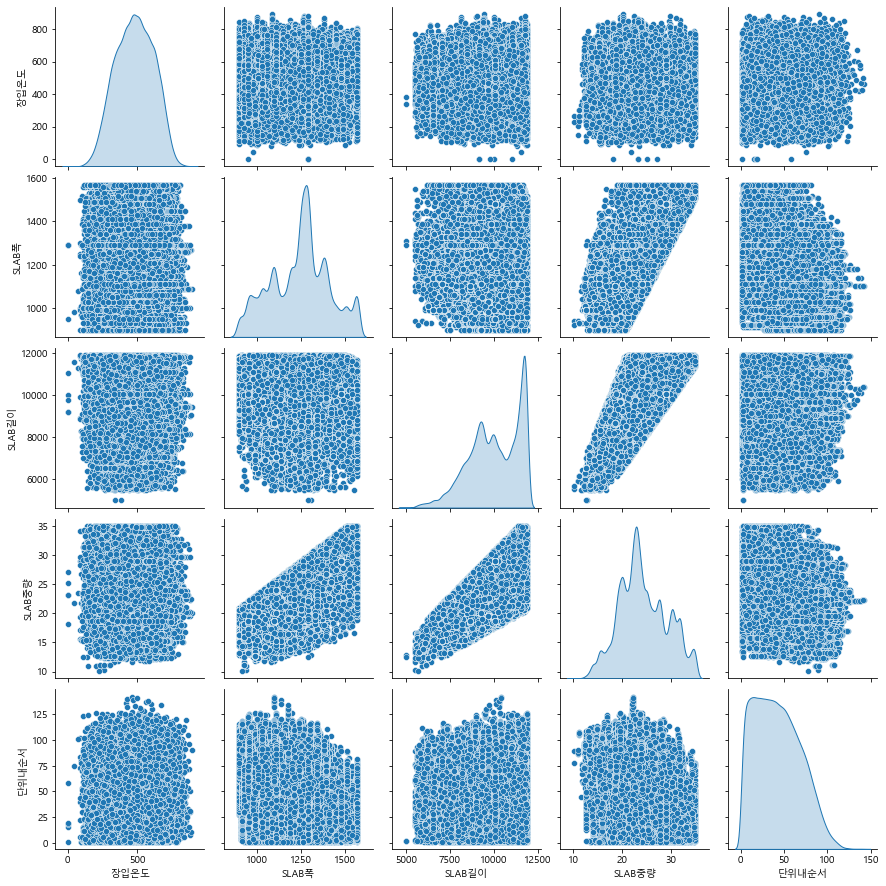

In [10]:
#탐색적 분석 : 장입온도(target)과 독립변수간의 관계를 산점도로 그려 확인
#KDE(커널밀도추정) 방식으로 지정해 히스토그램은 확률밀도함수를 추정하는 형태로 표현

sns.pairplot(df[["장입온도", "SLAB폭", "SLAB길이", "SLAB중량", "단위내순서"]], diag_kind="kde")

In [11]:
# 독립변수 표준화를 위해 변수별 평균과 표준편차를 계산하고, 추후 활용을 위해 csv로 저장

stats = df.describe() #데이터 요약
stats = stats.transpose() #행열 전치
stats.to_csv("hcr_stats.csv", encoding="CP949") #저장
stats

count          mean          std        min        25%  \
SLAB폭        113263.0   1245.311443   162.988048   900.0000  1110.0000   
SLAB길이       113263.0  10003.960464  1424.851157  5000.0000  9000.0000   
SLAB중량       113263.0     24.297478     4.865515    10.0900    20.7700   
단위내순서        113263.0     42.214298    25.930190     1.0000    21.0000   
성분AS         113263.0      0.005250     0.000963     0.0000     0.0050   
성분C          113263.0      0.050278     0.044684     0.0010     0.0310   
성분B          113263.0      1.113515     3.562105     0.0000     0.0000   
성분CA         113263.0      0.569047     2.771934     0.0000     0.0000   
성분CU         113263.0      0.018320     0.013688     0.0050     0.0120   
성분CR         113263.0      0.020535     0.010622     0.0100     0.0200   
성분MO         113263.0      0.000603     0.004995     0.0000     0.0000   
성분MN         113263.0      0.322023     0.256944     0.0450     0.1840   
성분N          113263.0     23.205681     8.732105     0.0000    17.0000   
성분P          113263.0      0.011522     0.009462     0.0034     0.0080   
성분S          113263.0      0.003422     0.001322     0.0010     0.0028   
성분TOTALAL    113263.0      0.027776     0.006528     0.0100     0.0230   
성분SOLAL      113263.0      0.026297     0.006447     0.0080     0.0220   
평균TS         113263.0    361.193982    76.687432     0.0000   320.0000   
전단_정정LT      113263.0      1.008626     4.907927     0.0000     0.0000   
정정_장입LT      113263.0      9.409573    17.637032     0.1000     5.8000   
장입온도         113263.0    478.443463   134.545369     0.0000   377.0000   
스카핑여부        113263.0      0.105083     0.306662     0.0000     0.0000   
성분V          113263.0      0.000493     0.000757     0.0000     0.0000   
월구분          113263.0      6.608416     3.498672     1.0000     4.0000   
정정_압연작업지시LT  113263.0     -0.261404    17.704108   -16.1000    -3.7000   

                    50%         75%         max  
SLAB폭         1260.0000   1360.0000   1570.0000  
SLAB길이       10040.0000  11380.0000  11870.0000  
SLAB중량          23.6100     27.7500     35.0000  
단위내순서           40.0000     61.0000    142.0000  
성분AS             0.0050      0.0060      0.0080  
성분C              0.0392      0.0601      0.2125  
성분B              0.0000      0.0000     21.0000  
성분CA             0.0000      0.0000    124.0000  
성분CU             0.0150      0.0200      0.3000  
성분CR             0.0200      0.0200      0.4200  
성분MO             0.0000      0.0000      0.1000  
성분MN             0.1990      0.4280      1.5090  
성분N             21.0000     28.0000    120.0000  
성분P              0.0093      0.0109      0.1070  
성분S              0.0032      0.0036      0.0113  
성분TOTALAL        0.0270      0.0320      0.0610  
성분SOLAL          0.0260      0.0300      0.0590  
평균TS           336.0000    418.0000    608.0000  
전단_정정LT          0.0000      0.0000    678.4000  
정정_장입LT          8.6000     12.1000   4026.9000  
장입온도           480.0000    582.0000    893.0000  
스카핑여부            0.0000      0.0000      1.0000  
성분V              0.0000      0.0010      0.0050  
월구분              7.0000     10.0000     12.0000  
정정_압연작업지시LT     -0.9000      2.3000   4011.2000

In [12]:
# 데이터셋 분할 train 80%, test 20%

x_train = df.sample(frac=0.8, random_state=0) #데이터셋 분리 train 80%
x_test = df.drop(x_train.index) #test 데이터셋 생성
y_train = x_train.pop("장입온도") #x_train에서 장입온도 열 정보만 뽑아 y_train에 저장
y_test = x_test.pop("장입온도") #x_test에서 장입온도 열 정보만 뽑아 y_test에 저장

x_train.shape, x_test.shape, y_train.shape, y_test.shape #train, test 데이터셋 확인

((90610, 24), (22653, 24), (90610,), (22653,))

In [13]:
# 수치형 데이터셋 표준화 함수 정의

def norm(df):
    result = df.copy()
    for col in df.columns:
        result[col] = (df[col] - stats.loc[col, "mean"]) / stats.loc[col, "std"]
    return result

x_train_normed = norm(x_train) #x_train 표준화
x_test_normed = norm(x_test) #x_test 표준화

In [14]:
x_train_normed.describe().round(2)
x_test_normed.describe().round(2)

SLAB폭    SLAB길이    SLAB중량     단위내순서      성분AS       성분C       성분B  \
count  22653.00  22653.00  22653.00  22653.00  22653.00  22653.00  22653.00   
mean      -0.00     -0.00     -0.00     -0.01     -0.01     -0.00     -0.01   
std        1.01      1.00      1.00      1.00      1.00      1.00      0.98   
min       -2.12     -3.15     -2.92     -1.59     -3.38     -1.10     -0.31   
25%       -0.83     -0.71     -0.72     -0.82     -0.26     -0.44     -0.31   
50%        0.09      0.03     -0.15     -0.09     -0.26     -0.25     -0.31   
75%        0.70      0.97      0.71      0.72      0.78      0.21     -0.31   
max        1.99      1.31      2.20      3.85      2.86      3.63      5.58   

           성분CA      성분CU      성분CR  ...       성분S  성분TOTALAL   성분SOLAL  \
count  22653.00  22653.00  22653.00  ...  22653.00   22653.00  22653.00   
mean       0.01     -0.01     -0.00  ...     -0.00       0.01      0.01   
std        1.10      0.98      0.97  ...      0.98       1.00      1.00   
min       -0.21     -0.90     -0.99  ...     -1.76      -2.72     -2.84   
25%       -0.21     -0.46     -0.05  ...     -0.47      -0.73     -0.67   
50%       -0.21     -0.24     -0.05  ...     -0.17      -0.12     -0.05   
75%       -0.21      0.12     -0.05  ...      0.13       0.65      0.57   
max       44.53     20.58     37.61  ...      5.89       4.94      4.92   

           평균TS   전단_정정LT   정정_장입LT     스카핑여부       성분V       월구분  정정_압연작업지시LT  
count  22653.00  22653.00  22653.00  22653.00  22653.00  22653.00     22653.00  
mean      -0.01      0.01     -0.00      0.00     -0.00      0.00        -0.00  
std        1.00      1.06      0.44      1.01      1.00      0.99         0.45  
min       -4.71     -0.21     -0.53     -0.34     -0.65     -1.60        -0.89  
25%       -0.54     -0.21     -0.20     -0.34     -0.65     -0.75        -0.19  
50%       -0.33     -0.21     -0.04     -0.34     -0.65      0.11        -0.04  
75%        0.73     -0.21      0.15     -0.34      0.67      0.97         0.14  
max        3.17     90.79     31.54      2.92      5.95      1.54        31.45  

[8 rows x 24 columns]

In [15]:
# 네트워크 구조 정의

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation="relu", input_shape=[len(x_train.columns)]),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3200      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 14,081
Trainable params: 14,081
Non-trainable params: 0
_________________________________________________________________


In [16]:
print(len(x_train.columns)*128+128)
print(128*64+64)
print(64*32+32)
print(32*16+16)
print(16+1)

3200
8256
2080
528
17


In [17]:
# 모델 컴파일. 손실함수로 mse, 최적화 함수로 Adam, 평가지표로 mae, mse 사용

optimizer = tf.keras.optimizers.Adam() #tf.keras.optimizers.RMSprop()으로도 변경해서 학습해볼것

#손실함수MSE, 평가지표는 MAE와 MSE

model.compile(loss="mse", optimizer=optimizer, metrics=["mae", "mse"])

In [18]:
# 모델 훈련 및 평가
#train 데이터 중 25%를 validation 데이터로 나눠 학습, val_loss가 20 epochs 동안 향상이 안될때 학습 종료

tf.random.set_seed(1234)
history= model.fit(x_train_normed, y_train, epochs=500, batch_size=32, validation_split=0.25,
          callbacks=[tf.keras.callbacks.EarlyStopping(patience=20, monitor="val_loss")])     # 개인노트북 10분 소요

#test 데이터셋으로 모델 평가

model.evaluate(x_test_normed, y_test, verbose=0)  # 0 = silent, 1(default) = progress bar, 2 = one line per epoch.

Epoch 1/500
2124/2124 [==============================] - 6s 2ms/step - loss: 16265.4609 - mae: 86.6756 - mse: 16265.4609 - val_loss: 6420.7407 - val_mae: 65.2010 - val_mse: 6420.7407
Epoch 2/500
2124/2124 [==============================] - 4s 2ms/step - loss: 6294.4243 - mae: 63.5486 - mse: 6294.4243 - val_loss: 6130.3638 - val_mae: 62.5011 - val_mse: 6130.3638
Epoch 3/500
2124/2124 [==============================] - 4s 2ms/step - loss: 5990.9468 - mae: 62.4888 - mse: 5990.9468 - val_loss: 6162.2871 - val_mae: 64.3823 - val_mse: 6162.2871
Epoch 4/500
2124/2124 [==============================] - 5s 2ms/step - loss: 5903.2158 - mae: 61.9995 - mse: 5903.2158 - val_loss: 5795.8105 - val_mae: 61.2947 - val_mse: 5795.8105
Epoch 5/500
2124/2124 [==============================] - 4s 2ms/step - loss: 5764.3330 - mae: 61.3279 - mse: 5764.3330 - val_loss: 5883.0537 - val_mae: 62.7894 - val_mse: 5883.0537
Epoch 6/500
2124/2124 [==============================] - 5s 2ms/step - loss: 5719.7129 - mae:

[5491.47021484375, 58.98273468017578, 5491.47021484375]

In [19]:
# history 출력

hist = pd.DataFrame(history.history) #history.history에 저장된 값을 데이터프레임으로 변환
hist["epoch"] = history.epoch #hist 데이터프레임에 ‘epoch’열 추가
hist.tail()

loss        mae          mse     val_loss    val_mae      val_mse  \
119  4894.651855  56.150658  4894.651855  5416.567383  59.395714  5416.567383   
120  4883.680664  56.084641  4883.680664  5576.073242  61.013752  5576.073242   
121  4887.395020  56.114544  4887.395020  5401.033203  59.234982  5401.033203   
122  4883.592285  56.070713  4883.592285  5481.643066  59.830997  5481.643066   
123  4880.157227  56.084297  4880.157227  5505.625000  58.881584  5505.625000   

     epoch  
119    119  
120    120  
121    121  
122    122  
123    123

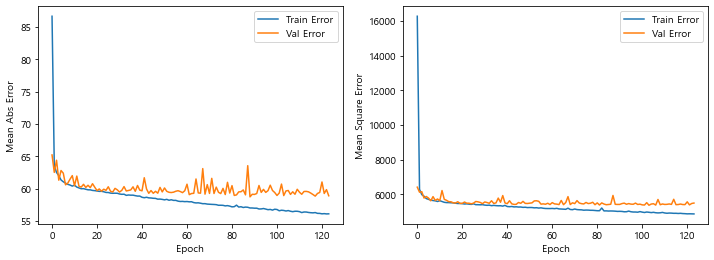

In [20]:
# train, validation 데이터셋의 mae, mse 그래프 출력

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1) #MAE 그래프 출력
plt.xlabel("Epoch")
plt.ylabel("Mean Abs Error")
plt.plot(hist["epoch"], hist["mae"], label="Train Error")
plt.plot(hist["epoch"], hist["val_mae"], label = "Val Error")
plt.legend()

plt.subplot(1, 2, 2) #MSE 그래프 출력
plt.xlabel("Epoch")
plt.ylabel("Mean Square Error")
plt.plot(hist["epoch"], hist["mse"], label="Train Error")
plt.plot(hist["epoch"], hist["val_mse"], label = "Val Error")
plt.legend()
plt.show()

In [21]:
# 모델 예측

pred = model.predict(x_test_normed) #테스트 결과 확인
df_test = pd.DataFrame({"실제":y_test[:10], "예측":pred[:10,0], "잔차":pred[:10,0]-y_test[:10]})
df_test

708/708 [==============================] - 1s 901us/step


실제          예측          잔차
2   460  534.144653   74.144653
10  418  352.034729  -65.965271
13  365  331.002319  -33.997681
20  577  583.154541    6.154541
21  521  588.941101   67.941101
27  345  340.904633   -4.095367
30  448  496.146942   48.146942
43  309  276.632385  -32.367615
46  271  477.638794  206.638794
55  611  462.648376 -148.351624

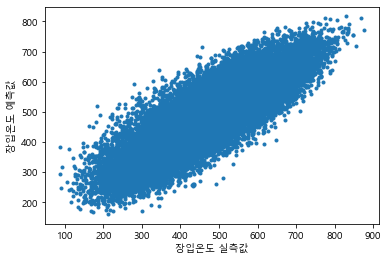

In [22]:
# 산점도로 테스트 결과 확인

plt.scatter(y_test, pred, marker=".")
plt.xlabel("장입온도 실측값")
plt.ylabel("장입온도 예측값")
plt.show()

In [23]:
# 결정계수(r squared) 산출

y = y_test.to_numpy() # pandas -> ndarray 변환
ybar = np.sum(y)/len(y)  # 평균
ssr = np.sum((pred-ybar)**2) 
sst =  np.sum((y-ybar)**2)
r_squared =ssr/sst
print("r_squared : {}%".format(round(r_squared*100,2)))

r_squared : 77.21%


In [24]:
# 케라스 모델로 저장

save_path = "hcr_model.h5"
model.save(save_path, include_optimizer=True)

In [25]:
# 저장한 모델 활용을 위한 predict 코드
# 새로운 데이터에 개발한 모델을 활용하기 위해서는 모델 개발시의 전처리 과정을 똑같이 거쳐야 함

df = pd.read_csv("./hcr.csv", encoding="CP949").drop('장입온도', axis=1) #새로운 데이터 불러오기
stats = pd.read_csv("hcr_stats.csv", index_col=0, encoding="CP949") #첫번째 열을 인덱스로 지정
stats

count          mean          std        min        25%  \
SLAB폭        113263.0   1245.311443   162.988048   900.0000  1110.0000   
SLAB길이       113263.0  10003.960464  1424.851157  5000.0000  9000.0000   
SLAB중량       113263.0     24.297478     4.865515    10.0900    20.7700   
단위내순서        113263.0     42.214298    25.930190     1.0000    21.0000   
성분AS         113263.0      0.005250     0.000963     0.0000     0.0050   
성분C          113263.0      0.050278     0.044684     0.0010     0.0310   
성분B          113263.0      1.113515     3.562105     0.0000     0.0000   
성분CA         113263.0      0.569047     2.771934     0.0000     0.0000   
성분CU         113263.0      0.018320     0.013688     0.0050     0.0120   
성분CR         113263.0      0.020535     0.010622     0.0100     0.0200   
성분MO         113263.0      0.000603     0.004995     0.0000     0.0000   
성분MN         113263.0      0.322023     0.256944     0.0450     0.1840   
성분N          113263.0     23.205681     8.732105     0.0000    17.0000   
성분P          113263.0      0.011522     0.009462     0.0034     0.0080   
성분S          113263.0      0.003422     0.001322     0.0010     0.0028   
성분TOTALAL    113263.0      0.027776     0.006528     0.0100     0.0230   
성분SOLAL      113263.0      0.026297     0.006447     0.0080     0.0220   
평균TS         113263.0    361.193982    76.687432     0.0000   320.0000   
전단_정정LT      113263.0      1.008626     4.907927     0.0000     0.0000   
정정_장입LT      113263.0      9.409573    17.637032     0.1000     5.8000   
장입온도         113263.0    478.443463   134.545369     0.0000   377.0000   
스카핑여부        113263.0      0.105083     0.306662     0.0000     0.0000   
성분V          113263.0      0.000493     0.000757     0.0000     0.0000   
월구분          113263.0      6.608416     3.498672     1.0000     4.0000   
정정_압연작업지시LT  113263.0     -0.261404    17.704108   -16.1000    -3.7000   

                    50%         75%         max  
SLAB폭         1260.0000   1360.0000   1570.0000  
SLAB길이       10040.0000  11380.0000  11870.0000  
SLAB중량          23.6100     27.7500     35.0000  
단위내순서           40.0000     61.0000    142.0000  
성분AS             0.0050      0.0060      0.0080  
성분C              0.0392      0.0601      0.2125  
성분B              0.0000      0.0000     21.0000  
성분CA             0.0000      0.0000    124.0000  
성분CU             0.0150      0.0200      0.3000  
성분CR             0.0200      0.0200      0.4200  
성분MO             0.0000      0.0000      0.1000  
성분MN             0.1990      0.4280      1.5090  
성분N             21.0000     28.0000    120.0000  
성분P              0.0093      0.0109      0.1070  
성분S              0.0032      0.0036      0.0113  
성분TOTALAL        0.0270      0.0320      0.0610  
성분SOLAL          0.0260      0.0300      0.0590  
평균TS           336.0000    418.0000    608.0000  
전단_정정LT          0.0000      0.0000    678.4000  
정정_장입LT          8.6000     12.1000   4026.9000  
장입온도           480.0000    582.0000    893.0000  
스카핑여부            0.0000      0.0000      1.0000  
성분V              0.0000      0.0010      0.0050  
월구분              7.0000     10.0000     12.0000  
정정_압연작업지시LT     -0.9000      2.3000   4011.2000

In [26]:
#모델 불러오기

hcr_model = tf.keras.models.load_model("hcr_model.h5")

In [27]:
# 수치형 변수들의 컬럼만 뽑아 numeric_vars에 저장

numeric_vars = []
for col in df.columns:
    if df[col].dtypes != "object":
        numeric_vars.append(col)

df_treatment = df[numeric_vars] #수치형 변수만 추출
df_treatment

SLAB폭  SLAB길이  SLAB중량  단위내순서   성분AS     성분C  성분B  성분CA   성분CU  성분CR  \
0        1570    9970   30.60   14.0  0.004  0.0016    0     0  0.009  0.01   
1        1020   11860   23.65   79.0  0.005  0.0433    0     0  0.017  0.02   
2        1500   11810   34.63   21.0  0.005  0.0020    0     2  0.008  0.02   
3        1570    9430   28.94   17.0  0.004  0.0016    0     0  0.009  0.01   
4        1500   11870   34.81   25.0  0.004  0.0023    0     0  0.008  0.02   
...       ...     ...     ...    ...    ...     ...  ...   ...    ...   ...   
113362   1250    6090   14.88   42.0  0.006  0.1155    0     0  0.016  0.02   
113363   1250    6070   14.83   41.0  0.006  0.1155    0     0  0.016  0.02   
113364   1340    8140   21.32   23.0  0.007  0.1163    0     0  0.015  0.02   
113365   1250    8500   20.77   31.0  0.006  0.1158    0     0  0.019  0.02   
113366   1250    8500   20.77   32.0  0.006  0.1158    0     0  0.019  0.02   

        ...     성분S  성분TOTALAL  성분SOLAL   평균TS  전단_정정LT  정정_장입LT  스카핑여부  \
0       ...  0.0029      0.029    0.026  255.0      0.0      8.0      0   
1       ...  0.0029      0.022    0.021  340.0      0.0     13.4      0   
2       ...  0.0032      0.029    0.026  253.0      0.0      7.5      0   
3       ...  0.0029      0.029    0.026  252.0      0.0      7.8      0   
4       ...  0.0030      0.029    0.028  253.0      0.0      7.2      0   
...     ...     ...        ...      ...    ...      ...      ...    ...   
113362  ...  0.0020      0.023    0.021  421.0      0.0      7.1      0   
113363  ...  0.0020      0.023    0.021  423.0      0.0      7.2      0   
113364  ...  0.0040      0.020    0.019  417.0      0.0      8.3      0   
113365  ...  0.0030      0.035    0.033  422.0      0.0      7.2      0   
113366  ...  0.0030      0.035    0.033  421.0      0.0      7.5      0   

          성분V  월구분  정정_압연작업지시LT  
0       0.002    4         -6.4  
1       0.000   10          3.2  
2       0.002    4         -7.0  
3       0.002    4         -6.6  
4       0.002    4         -7.5  
...       ...  ...          ...  
113362  0.001   10         -2.4  
113363  0.001   10         -2.4  
113364  0.001   10         -0.7  
113365  0.000   10         -2.0  
113366  0.000   10         -1.7  

[113367 rows x 24 columns]

In [28]:
# 이터셋 표준화

def norm(df):
    result = df.copy()
    for col in df.columns:
        result[col] = (df[col] - stats.loc[col, "mean"]) / stats.loc[col, "std"]
    return result

normed = norm(df_treatment)

In [29]:
# 예측

pred = hcr_model.predict(normed)
df["장입온도예측치"] = pred.astype("int") #실수를 정수로 변환
df.to_csv("hcr_result.csv", index=None, encoding="CP949") #결과 저장
df #hcr_result.csv 파일 확인 시 마지막열에 장입온도예측치가 추가된것을 확인할 수 있음

3543/3543 [==============================] - 4s 1ms/step


SLAB폭  SLAB길이  SLAB중량 SLAB최초저장위치 연주구분  단위내순서   성분AS     성분C  성분B  \
0        1570    9970   30.60        3GC  2연주   14.0  0.004  0.0016    0   
1        1020   11860   23.65        2GA  2연주   79.0  0.005  0.0433    0   
2        1500   11810   34.63        3GC  2연주   21.0  0.005  0.0020    0   
3        1570    9430   28.94        2GC  2연주   17.0  0.004  0.0016    0   
4        1500   11870   34.81        2GC  2연주   25.0  0.004  0.0023    0   
...       ...     ...     ...        ...  ...    ...    ...     ...  ...   
113362   1250    6090   14.88        2GB  2연주   42.0  0.006  0.1155    0   
113363   1250    6070   14.83        2GB  2연주   41.0  0.006  0.1155    0   
113364   1340    8140   21.32        2GB  2연주   23.0  0.007  0.1163    0   
113365   1250    8500   20.77        2GB  2연주   31.0  0.006  0.1158    0   
113366   1250    8500   20.77        2GB  2연주   32.0  0.006  0.1158    0   

        성분CA  ...  정정_장입LT  전저장위치코드  발지야드포인트  스카핑여부   품명  롤단위지정구분    성분V  월구분  \
0          0  ...      8.0      3GB       4C      0   FH      NaN  0.002    4   
1          0  ...     13.4      3GB       5A      0   HR        D  0.000   10   
2          2  ...      7.5      3GB       4C      0   CR        F  0.002    4   
3          0  ...      7.8      3GB       4C      0   CR      NaN  0.002    4   
4          0  ...      7.2      5GG       4C      0   EG        F  0.002    4   
...      ...  ...      ...      ...      ...    ...  ...      ...    ...  ...   
113362     0  ...      7.1      3GB       5A      0  HGI        D  0.001   10   
113363     0  ...      7.2      3GB       5A      0  HGI        D  0.001   10   
113364     0  ...      8.3      5GG       5A      0  HGI        F  0.001   10   
113365     0  ...      7.2      3GB       5A      0  HGI        D  0.000   10   
113366     0  ...      7.5      5GG       5A      0  HGI        D  0.000   10   

        정정_압연작업지시LT  장입온도예측치  
0              -6.4      526  
1               3.2      383  
2              -7.0      534  
3              -6.6      543  
4              -7.5      544  
...             ...      ...  
113362         -2.4      601  
113363         -2.4      599  
113364         -0.7      532  
113365         -2.0      604  
113366         -1.7      598  

[113367 rows x 34 columns]